### Загрузка данных

### Добавление и анализ нового признака BMI

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# df = pd.read_csv('train.csv')
url = 'https://raw.githubusercontent.com/isakov03/obesity_risk_prediction/refs/heads/main/train.csv'
df = pd.read_csv(url)

print(f"Размер данных: {df.shape}")
print(f"Пропуски: {df.isnull().sum().sum()}")
print("Первые 5 строк данных:")
print(df.head())


Размер данных: (20758, 18)
Пропуски: 0
Первые 5 строк данных:
   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       

Создан новый признак: BMI
Среднее BMI: 30.24
Минимальное BMI: 12.87
Максимальное BMI: 55.00


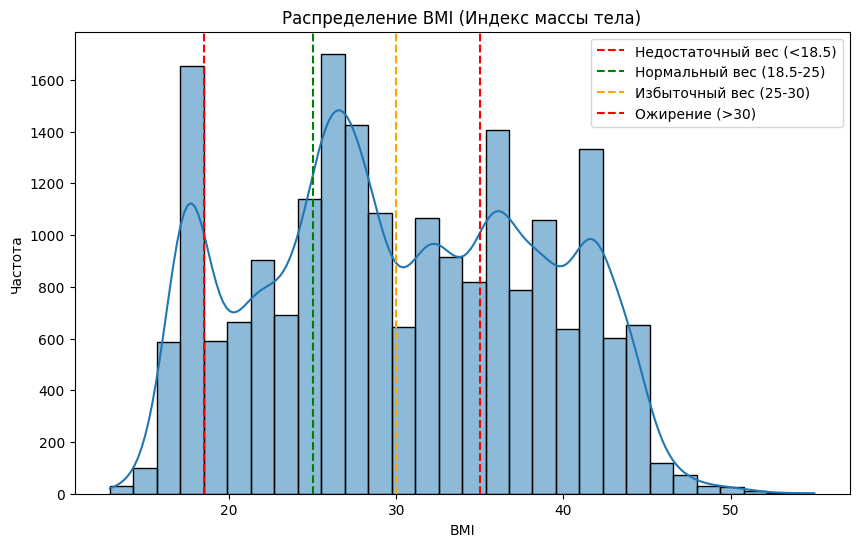

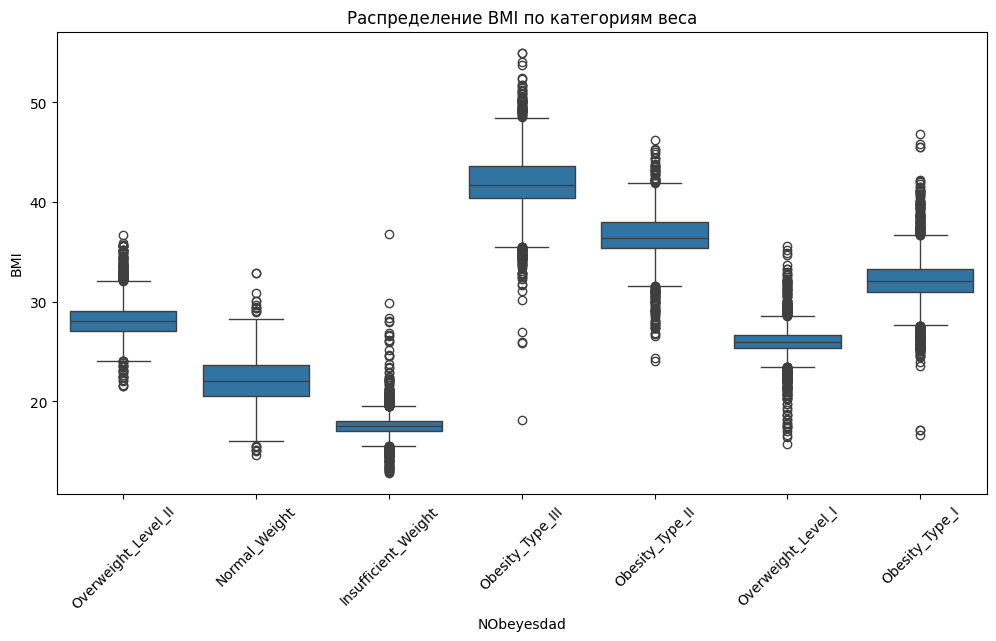

In [ ]:
df_eda = df.copy()

df_eda['BMI'] = df_eda['Weight'] / (df_eda['Height'] ** 2)
print("Создан новый признак: BMI")
print(f"Среднее BMI: {df_eda['BMI'].mean():.2f}")
print(f"Минимальное BMI: {df_eda['BMI'].min():.2f}")
print(f"Максимальное BMI: {df_eda['BMI'].max():.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(df_eda['BMI'], bins=30, kde=True)
plt.title('Распределение BMI (Индекс массы тела)')
plt.xlabel('BMI')
plt.ylabel('Частота')
plt.axvline(x=18.5, color='r', linestyle='--', label='Недостаточный вес (<18.5)')
plt.axvline(x=25, color='g', linestyle='--', label='Нормальный вес (18.5-25)')
plt.axvline(x=30, color='orange', linestyle='--', label='Избыточный вес (25-30)')
plt.axvline(x=35, color='red', linestyle='--', label='Ожирение (>30)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='BMI', data=df_eda)
plt.title('Распределение BMI по категориям веса')
plt.xticks(rotation=45)
plt.show()



### Добавления нового признака в датасет на основе анализа данных

In [ ]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

### Анализ данных

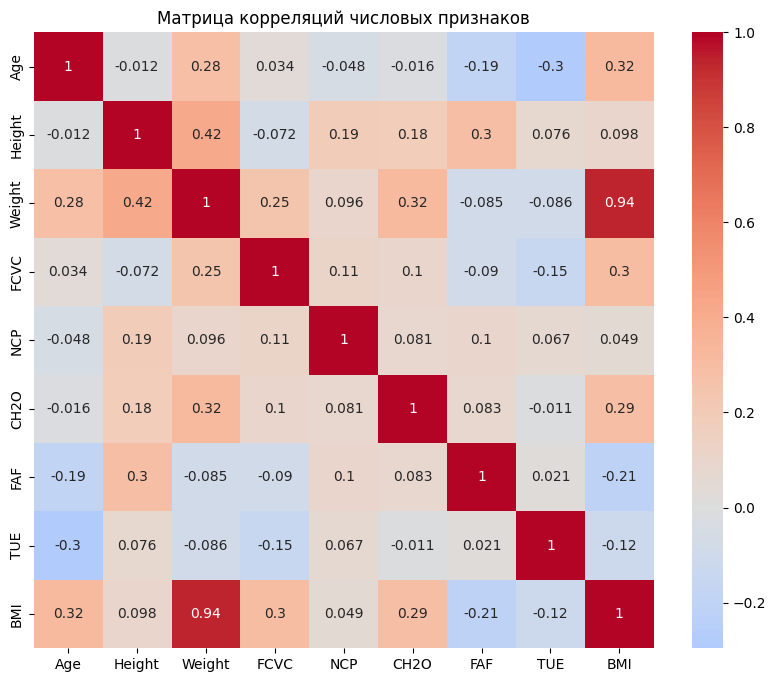

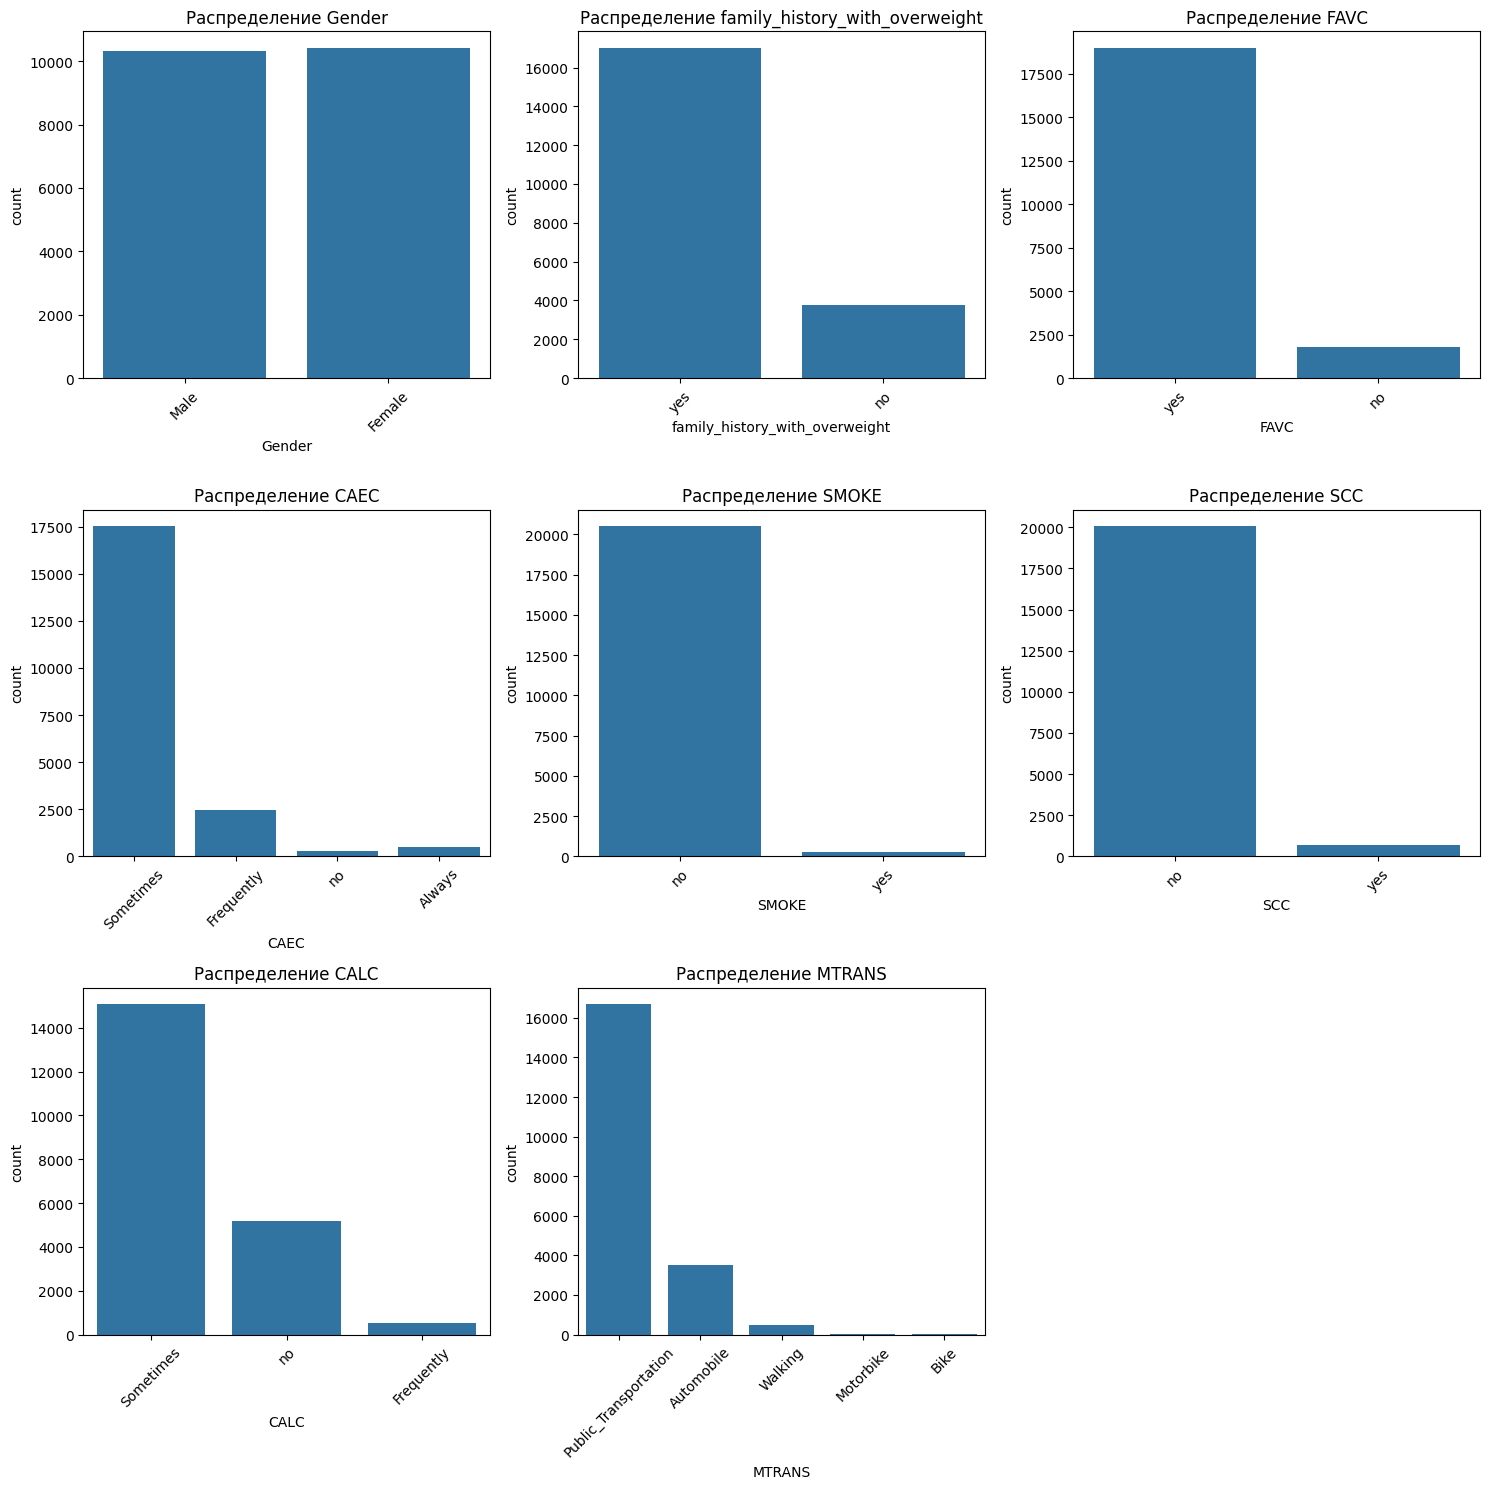

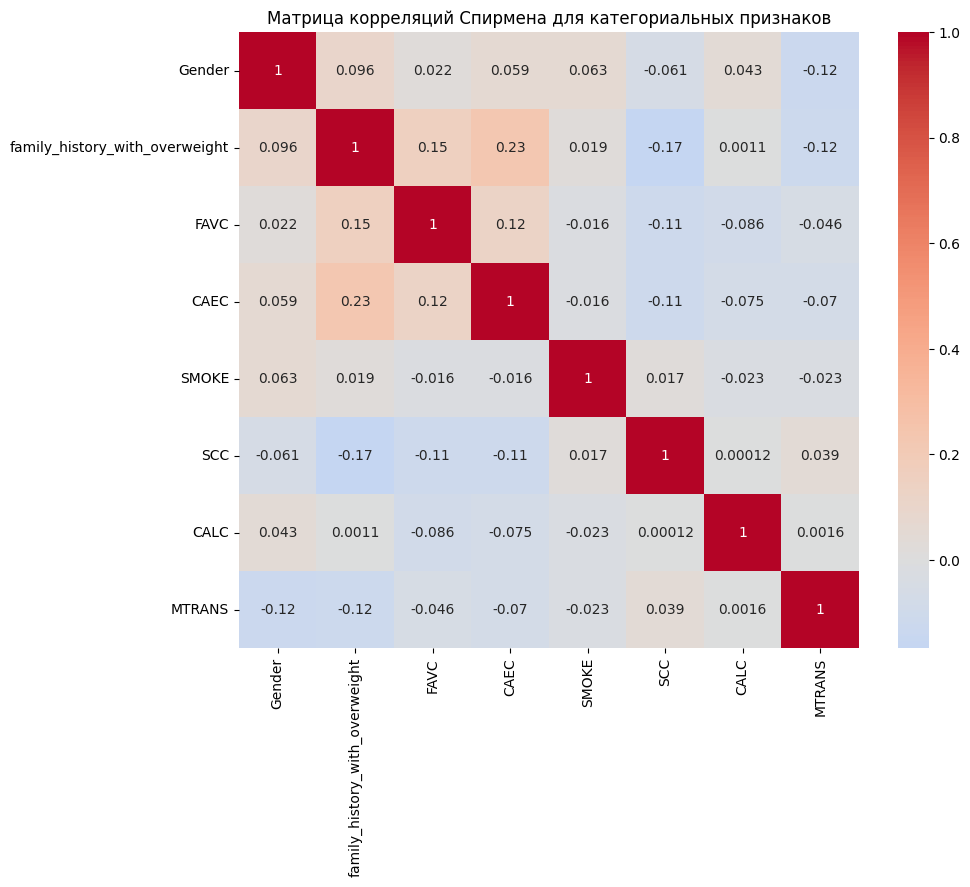

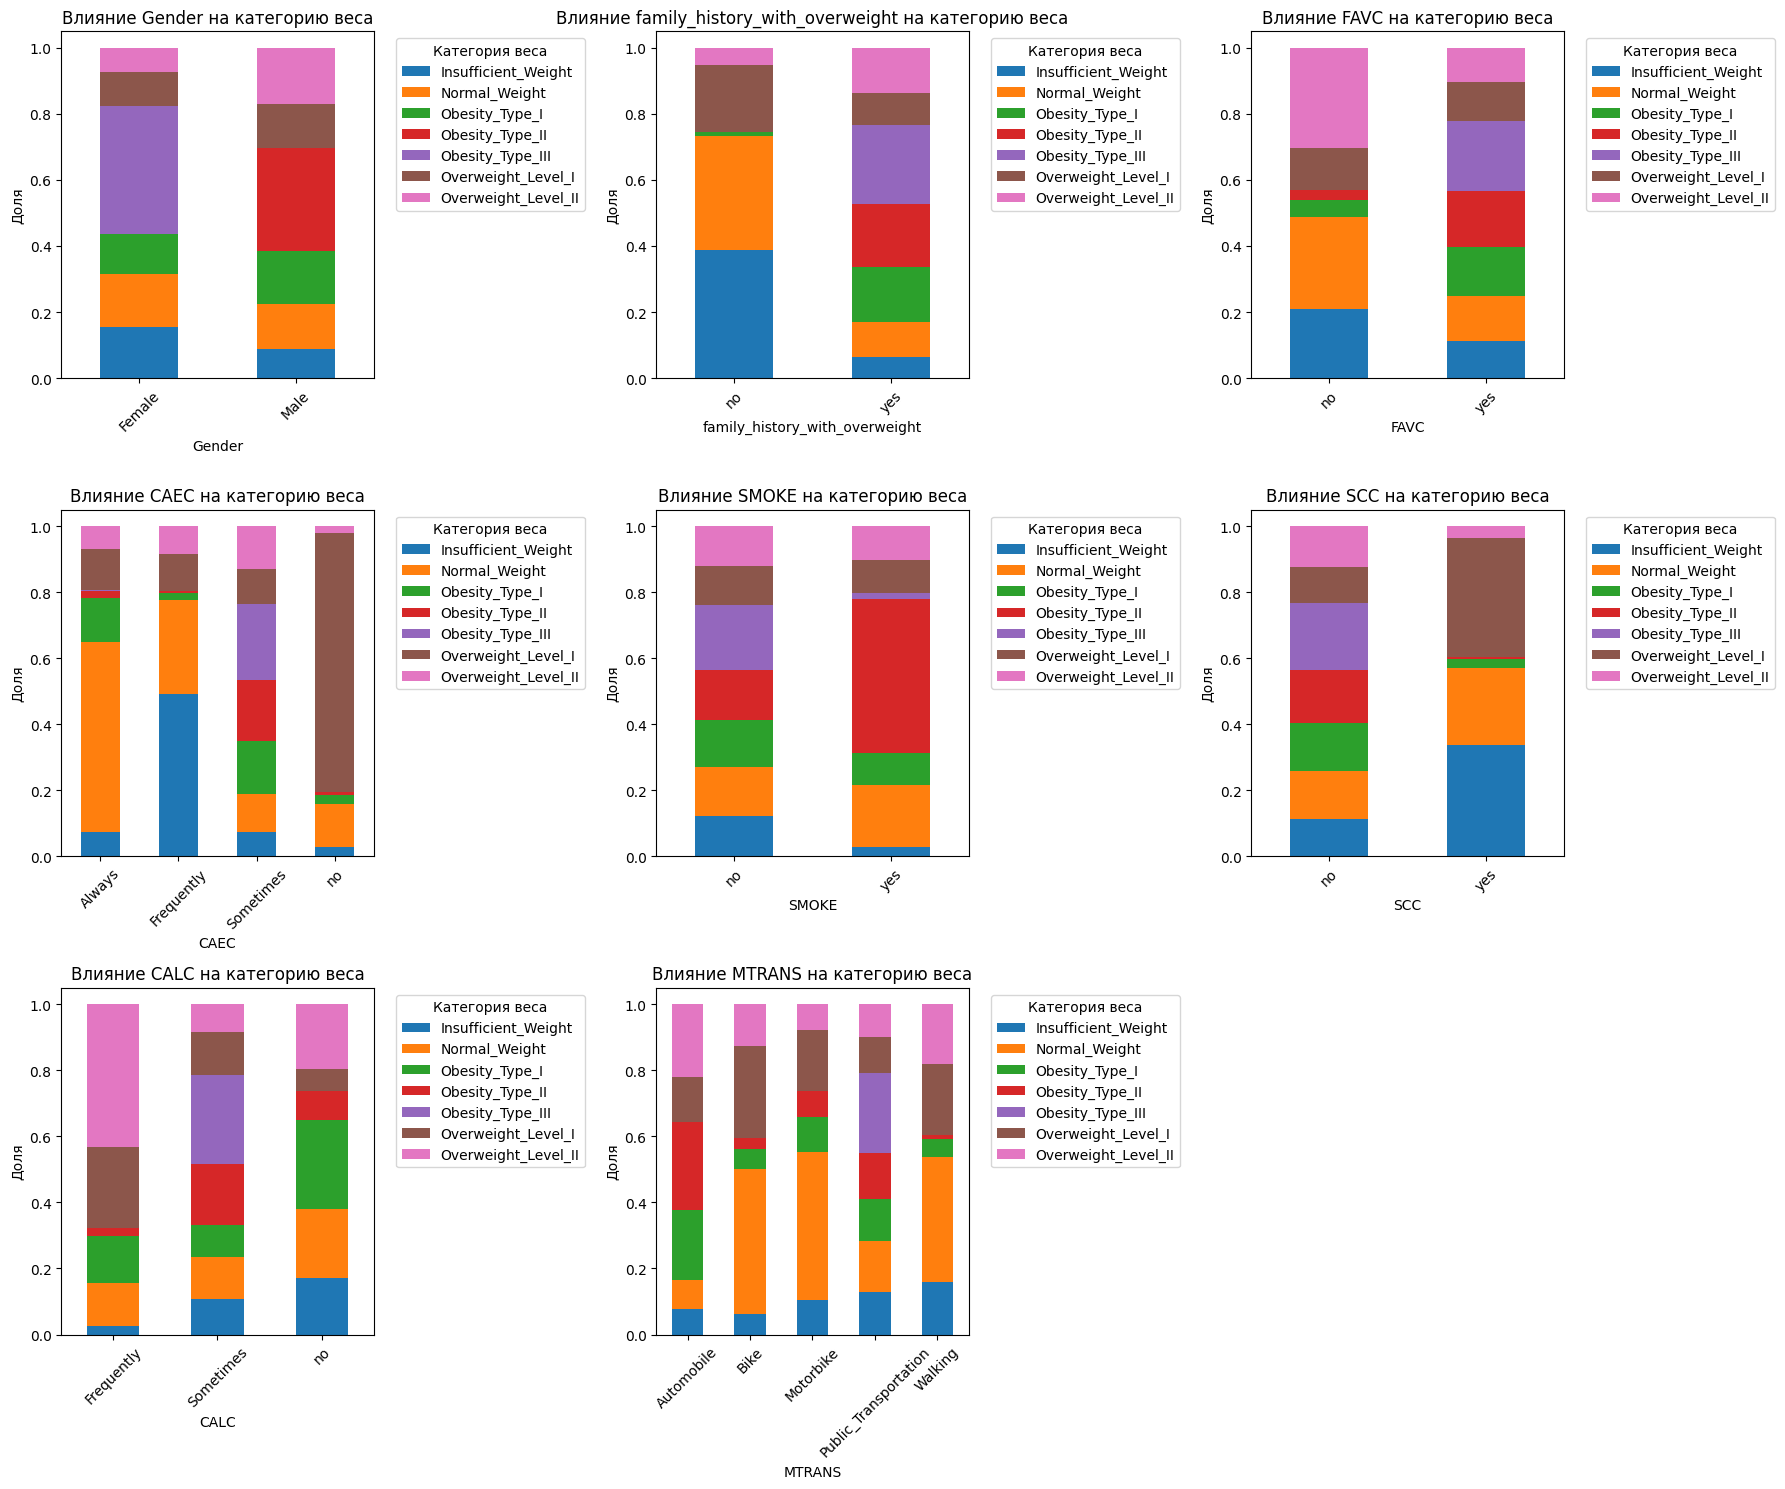

In [ ]:
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
correlation_matrix = df_eda[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций числовых признаков')
plt.show()

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']

for idx, col in enumerate(categorical_cols):
    ax = axes[idx//3, idx%3]
    sns.countplot(x=col, data=df_eda, ax=ax)
    ax.set_title(f'Распределение {col}')
    ax.tick_params(axis='x', rotation=45)

for idx in range(len(categorical_cols), 9):
    axes[idx//3, idx%3].set_visible(False)

plt.tight_layout()
plt.show()

df_cat = df_eda[categorical_cols].copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

correlation_matrix = df_cat.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций Спирмена для категориальных признаков')
plt.show()

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
for idx, col in enumerate(categorical_cols):
    ax = axes[idx//3, idx%3]
    crosstab = pd.crosstab(df_eda[col], df_eda['NObeyesdad'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Влияние {col} на категорию веса')
    ax.set_xlabel(col)
    ax.set_ylabel('Доля')
    ax.legend(title='Категория веса', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)

for idx in range(len(categorical_cols), 9):
    axes[idx//3, idx%3].set_visible(False)

plt.tight_layout()
plt.show()



### Анализ дисбаланса классов

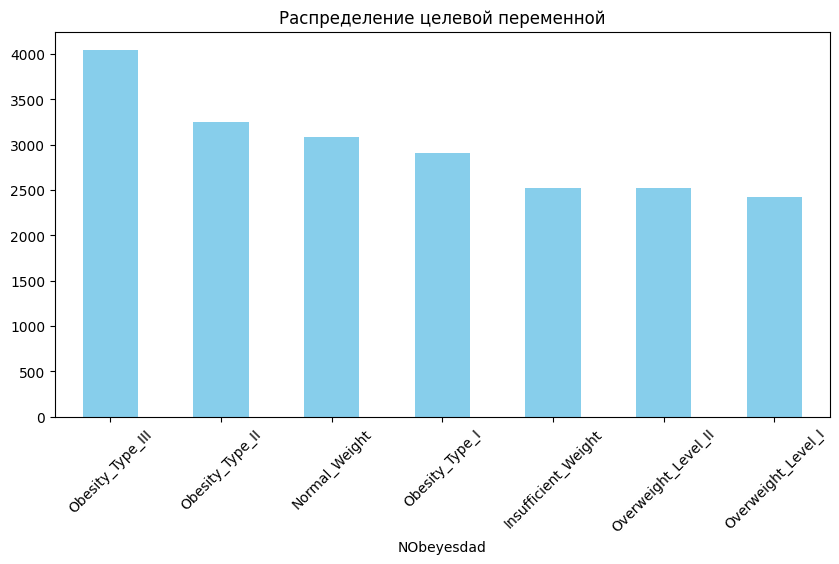

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


In [ ]:

plt.figure(figsize=(10, 5))
df['NObeyesdad'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Распределение целевой переменной')
plt.xticks(rotation=45)
plt.show()

print(df['NObeyesdad'].value_counts())


### Кодировка целевой переменной и разбиение на обучающую и тестовую подвыборки

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


X = df[numeric_cols + categorical_cols].copy()
y = df['NObeyesdad']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)




### Создание и анализ бейзлайн модели

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
import numpy as np

binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
ordinal_cols = ['CAEC', 'CALC']
nominal_cols = ['MTRANS']
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

caec_order = [['no', 'Sometimes', 'Frequently', 'Always']]
calc_order = [['no', 'Sometimes', 'Frequently']]

preprocessor = ColumnTransformer([
    ('binary', OneHotEncoder(drop='first'), binary_cols),
    ('caec', OrdinalEncoder(categories=caec_order), ['CAEC']),
    ('calc', OrdinalEncoder(categories=calc_order), ['CALC']),
    ('nominal', OneHotEncoder(), nominal_cols),
    ('numeric', StandardScaler(), numeric_cols)
])



baseline_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='stratified', random_state=42))
])

baseline_pipeline.fit(X_train_all, y_train_all)
y_pred_baseline = baseline_pipeline.predict(X_test_all)
baseline_f1 = f1_score(y_test_all, y_pred_baseline, average='macro')

print(f"\nBaseline модель построена")
print(f"   Стратегия: 'stratified' (предсказывает в соответствии с распределением классов)")
print(f"   F1-Score (macro): {baseline_f1:.4f}")
print(f"   Точность (accuracy): {np.mean(y_pred_baseline == y_test_all):.4f}")

print("\n Распределение предсказаний Baseline:")
unique, counts = np.unique(y_pred_baseline, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"   {cls}: {count} предсказаний ({count/len(y_pred_baseline)*100:.1f}%)")




Baseline модель построена
   Стратегия: 'stratified' (предсказывает в соответствии с распределением классов)
   F1-Score (macro): 0.1442
   Точность (accuracy): 0.1481

 Распределение предсказаний Baseline:
   0: 499 предсказаний (12.0%)
   1: 636 предсказаний (15.3%)
   2: 563 предсказаний (13.6%)
   3: 615 предсказаний (14.8%)
   4: 816 предсказаний (19.7%)
   5: 495 предсказаний (11.9%)
   6: 528 предсказаний (12.7%)


### Функция для обучения всех моделей при помощи GridSearchCV
#### Возможно использование уменьшение размерности простравнства признаков, а также обучение модели без признака - gender

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import time

def search_params(X_train, y_train, X_test, y_test, without_gender=False, without_PCA=True):
    if (without_gender):
        binary_cols = [ 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
    else:
        binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
    ordinal_cols = ['CAEC', 'CALC']
    nominal_cols = ['MTRANS']
    numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

    caec_order = [['no', 'Sometimes', 'Frequently', 'Always']]
    calc_order = [['no', 'Sometimes', 'Frequently']]

    preprocessor = ColumnTransformer([
        ('binary', OneHotEncoder(drop='first'), binary_cols),
        ('caec', OrdinalEncoder(categories=caec_order), ['CAEC']),
        ('calc', OrdinalEncoder(categories=calc_order), ['CALC']),
        ('nominal', OneHotEncoder(), nominal_cols),
        ('numeric', StandardScaler(), numeric_cols)
    ])
    if(without_PCA):
        print("ТЕСТИРОВАНИЕ И СРАВНЕНИЕ МОДЕЛЕЙ С ГИПЕРПАРАМЕТРИЗАЦИЕЙ")
    else:
        print("ТЕСТИРОВАНИЕ И СРАВНЕНИЕ МОДЕЛЕЙ С ГИПЕРПАРАМЕТРИЗАЦИЕЙ С УМЕНЬШЕНИЕМ РАЗМЕРНОСТИ ПРОСТРАНСТВА ПРИЗНАКОВ")

    models_config = [
        {
            'name': 'SVM',
            'model': SVC(random_state=42, probability=True),
            'params': {
                'classifier__C': [0.1, 1, 10],
                'classifier__kernel': ['linear', 'rbf'],
                'classifier__gamma': ['scale', 'auto']
            },
            'search_type': 'grid'
        },
        {
            'name': 'Random Forest',
            'model': RandomForestClassifier(random_state=42),
            'params': {
                'classifier__n_estimators': [100, 200, 300],
                'classifier__max_depth': [10, 20, None],
                'classifier__min_samples_split': [2, 5, 10]
            },
            'search_type': 'grid'
        },
        {
            'name': 'Gradient Boosting (sklearn)',
            'model': GradientBoostingClassifier(random_state=42),
            'params': {
                'classifier__n_estimators': [100, 200],
                'classifier__learning_rate': [0.01, 0.1, 0.2],
                'classifier__max_depth': [3, 7]
            },
            'search_type': 'grid'
        }
    ]

    result = []



    for config in models_config:
        print(f"\n ГИПЕРПАРАМЕТРИЗАЦИЯ {config['name']}:")
        if without_PCA:
            pipeline = Pipeline([
                ('preprocessor', preprocessor),
                ('classifier', config['model'])
            ])
        else:
            pipeline = Pipeline([
                ('preprocessor', preprocessor),
                ('pca', PCA(n_components=0.95,random_state=42)),
                ('classifier', config['model'])
            ])


        search = GridSearchCV(
            pipeline,
            config['params'],
            cv=5,
            scoring='f1_macro',
            n_jobs=-1,
            verbose=1
            )



        start_time = time.time()
        search.fit(X_train, y_train)
        train_time = time.time() - start_time

        y_pred = search.best_estimator_.predict(X_test)
        test_f1 = f1_score(y_test, y_pred, average='macro')

        result.append({
            'Model_name': config['name'],
            'Model': search.best_estimator_,
            'Best_Params': search.best_params_,
            'CV_F1_Mean': search.best_score_,
            'Test_F1': test_f1,
            'Train_Time': train_time
        })

        print(f"   Лучшие параметры: {search.best_params_}")
        print(f"   Лучший CV F1-Score: {search.best_score_:.4f}")
        print(f"   Тестовый F1-Score: {test_f1:.4f}")
        print(f"   Время обучения: {train_time:.2f} сек")

    return result

### Обучение моделей с подбором параметров при помощи GridSearchCV

In [ ]:
results = search_params(X_train_all,y_train_all,X_test_all, y_test_all)


ТЕСТИРОВАНИЕ И СРАВНЕНИЕ МОДЕЛЕЙ С ГИПЕРПАРАМЕТРИЗАЦИЕЙ

 ГИПЕРПАРАМЕТРИЗАЦИЯ SVM:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
   Лучшие параметры: {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
   Лучший CV F1-Score: 0.8653
   Тестовый F1-Score: 0.8763
   Время обучения: 130.01 сек

 ГИПЕРПАРАМЕТРИЗАЦИЯ Random Forest:
Fitting 5 folds for each of 27 candidates, totalling 135 fits
   Лучшие параметры: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
   Лучший CV F1-Score: 0.8893
   Тестовый F1-Score: 0.8927
   Время обучения: 61.03 сек

 ГИПЕРПАРАМЕТРИЗАЦИЯ Gradient Boosting (sklearn):
Fitting 5 folds for each of 12 candidates, totalling 60 fits
   Лучшие параметры: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
   Лучший CV F1-Score: 0.8901
   Тестовый F1-Score: 0.8960
   Время обучения: 483.63 сек


### Функция для обучения всех моделей при помощи optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def search_params_optuna(X_train, y_train, X_test, y_test, without_gender=False):
    if (without_gender):
        binary_cols = [ 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
    else:
        binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
    ordinal_cols = ['CAEC', 'CALC']
    nominal_cols = ['MTRANS']
    numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

    caec_order = [['no', 'Sometimes', 'Frequently', 'Always']]
    calc_order = [['no', 'Sometimes', 'Frequently']]

    preprocessor = ColumnTransformer([
        ('binary', OneHotEncoder(drop='first'), binary_cols),
        ('caec', OrdinalEncoder(categories=caec_order), ['CAEC']),
        ('calc', OrdinalEncoder(categories=calc_order), ['CALC']),
        ('nominal', OneHotEncoder(), nominal_cols),
        ('numeric', StandardScaler(), numeric_cols)
    ])
    def objective_random_forest(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'min_samples_split': trial.suggest_float('min_samples_split', 0.01, 1.0),
            'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.01, 0.5),
            'random_state': 42
        }
        model = RandomForestClassifier(**params)
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        scores = cross_val_score(
            pipeline, X_train, y_train,
            cv=5,
            scoring='f1_macro'
        )
        return scores.mean()
    def objective_gradient_boosting(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 5, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
            'min_samples_split': trial.suggest_float('min_samples_split', 0.01, 1.0),
            'random_state': 42
        }
        model = GradientBoostingClassifier(**params)
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        scores = cross_val_score(
            pipeline, X_train, y_train,
            cv=5,
            scoring='f1_macro'
        )
        return scores.mean()
    def objective_SVM(trial):
        params = {
            'C': trial.suggest_float('C', 0.01, 50),
            'gamma': trial.suggest_float('gamma', 0.1, 50),
            'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf']),
            'random_state': 42
        }
        model = SVC(**params)
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        scores = cross_val_score(
            pipeline, X_train, y_train,
            cv=5,
            scoring='f1_macro'
        )
        return scores.mean()

    def study_model(objective, name):
        study = optuna.create_study(
            direction='maximize',
            study_name=name,
            load_if_exists=True
        )

        study.optimize(
            objective,
            n_trials=15,
            show_progress_bar=True
        )
        return study

    result = []
    models_config = [
        {
            'name': 'SVM',
            'objective': objective_SVM
        },
        {
            'name': 'Random_forest',
            'objective': objective_random_forest
        },
        {
            'name': 'Gradient_boosting',
            'objective': objective_gradient_boosting
        },
    ]


    for config in models_config:
        start_time = time.time()
        study=study_model(config['objective'],config['name'])
        train_time = time.time() - start_time
        match config['name']:
            case "SVM":
                best_model =SVC(**study.best_params, random_state=42)
            case "Random_forest":
                best_model =RandomForestClassifier(**study.best_params, random_state=42)
            case "Gradient_boosting":
                best_model =GradientBoostingClassifier(**study.best_params, random_state=42)
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', best_model)
        ])
        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)
        test_f1 = f1_score(y_test, y_pred, average='macro')
        result.append({
                'Model_name': study.study_name,
                'Model': pipeline,
                'Best_Params': study.best_params,
                'CV_F1_Mean': study.best_value,
                'Test_F1': test_f1,
                'Train_Time': train_time
            })
        print(f"   Лучшие параметры: {study.best_params}")
        print(f"   Лучший CV F1-Score: {study.best_value:.4f}")
        print(f"   Тестовый F1-Score: {test_f1:.4f}")
        print(f"   Время обучения: {train_time:.2f} сек")
    return result



### Обучение моделей с подбором параметров при помощи библиотеки optuna

In [ ]:
results_optuna = search_params_optuna(X_train_all,y_train_all,X_test_all, y_test_all)

[I 2025-12-26 18:37:33,668] A new study created in memory with name: SVM


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-12-26 18:39:07,803] Trial 0 finished with value: 0.2437591165265065 and parameters: {'C': 45.79625012541212, 'gamma': 46.22375782434433, 'kernel': 'rbf'}. Best is trial 0 with value: 0.2437591165265065.
[I 2025-12-26 18:40:29,452] Trial 1 finished with value: 0.2777110398434677 and parameters: {'C': 22.1383242833543, 'gamma': 31.036404040532627, 'kernel': 'rbf'}. Best is trial 1 with value: 0.2777110398434677.
[I 2025-12-26 18:41:25,988] Trial 2 finished with value: 0.5482659541609901 and parameters: {'C': 5.316625567040513, 'gamma': 4.569089655906717, 'kernel': 'rbf'}. Best is trial 2 with value: 0.5482659541609901.
[I 2025-12-26 18:42:41,369] Trial 3 finished with value: 0.29191213538335214 and parameters: {'C': 20.65586058062932, 'gamma': 27.707733395445207, 'kernel': 'rbf'}. Best is trial 2 with value: 0.5482659541609901.
[I 2025-12-26 18:44:07,429] Trial 4 finished with value: 0.2519348742068415 and parameters: {'C': 31.162217974932336, 'gamma': 41.07293698312384, 'kernel'

[I 2025-12-26 18:50:10,204] A new study created in memory with name: Random_forest


   Лучшие параметры: {'C': 2.970970889441113, 'gamma': 46.07787053557638, 'kernel': 'linear'}
   Лучший CV F1-Score: 0.8515
   Тестовый F1-Score: 0.8555
   Время обучения: 753.90 сек


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-12-26 18:50:14,966] Trial 0 finished with value: 0.3326216289266848 and parameters: {'n_estimators': 446, 'max_depth': 7, 'min_samples_split': 0.2716267713560352, 'min_samples_leaf': 0.2505526880951918}. Best is trial 0 with value: 0.3326216289266848.
[I 2025-12-26 18:50:17,341] Trial 1 finished with value: 0.04660873108195791 and parameters: {'n_estimators': 380, 'max_depth': 20, 'min_samples_split': 0.6789440454229203, 'min_samples_leaf': 0.17701492074454844}. Best is trial 0 with value: 0.3326216289266848.
[I 2025-12-26 18:50:18,073] Trial 2 finished with value: 0.04660873108195791 and parameters: {'n_estimators': 96, 'max_depth': 17, 'min_samples_split': 0.7474149136433967, 'min_samples_leaf': 0.34747008552953534}. Best is trial 0 with value: 0.3326216289266848.
[I 2025-12-26 18:50:19,041] Trial 3 finished with value: 0.04660873108195791 and parameters: {'n_estimators': 137, 'max_depth': 4, 'min_samples_split': 0.011626132755427832, 'min_samples_leaf': 0.36023511116369866}.

[I 2025-12-26 18:51:08,885] A new study created in memory with name: Gradient_boosting


   Лучшие параметры: {'n_estimators': 243, 'max_depth': 12, 'min_samples_split': 0.030626024415867627, 'min_samples_leaf': 0.019588408598725418}
   Лучший CV F1-Score: 0.8471
   Тестовый F1-Score: 0.8573
   Время обучения: 56.93 сек


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2025-12-26 18:56:25,535] Trial 0 finished with value: 0.8850592892945137 and parameters: {'n_estimators': 153, 'max_depth': 11, 'learning_rate': 0.2627358358213478, 'min_samples_split': 0.09930702657272318}. Best is trial 0 with value: 0.8850592892945137.
[I 2025-12-26 18:57:16,177] Trial 1 finished with value: 0.8010153283016173 and parameters: {'n_estimators': 52, 'max_depth': 20, 'learning_rate': 0.9886190144127948, 'min_samples_split': 0.7289165633214794}. Best is trial 0 with value: 0.8850592892945137.
[I 2025-12-26 18:57:46,940] Trial 2 finished with value: 0.8433871002061494 and parameters: {'n_estimators': 48, 'max_depth': 16, 'learning_rate': 0.04301824809209089, 'min_samples_split': 0.5629392751658899}. Best is trial 0 with value: 0.8850592892945137.
[I 2025-12-26 18:58:29,900] Trial 3 finished with value: 0.7586848215084258 and parameters: {'n_estimators': 28, 'max_depth': 8, 'learning_rate': 0.8066962027675514, 'min_samples_split': 0.16186544583428733}. Best is trial 0 w

### Обучение моделей с предварительным уменьшением пространатсва признаков
#### Так как в предыдущих тестах лучше себя зарекомендовал GridsearchCV будем использовать именно этот вариант подбора гиперпараметров

In [ ]:
results_with_PCA = search_params(X_train_all,y_train_all,X_test_all, y_test_all, without_PCA=False)

ТЕСТИРОВАНИЕ И СРАВНЕНИЕ МОДЕЛЕЙ С ГИПЕРПАРАМЕТРИЗАЦИЕЙ С УМЕНЬШЕНИЕМ РАЗМЕРНОСТИ ПРОСТРАНСТВА ПРИЗНАКОВ

 ГИПЕРПАРАМЕТРИЗАЦИЯ SVM:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
   Лучшие параметры: {'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
   Лучший CV F1-Score: 0.8500
   Тестовый F1-Score: 0.8668
   Время обучения: 99.07 сек

 ГИПЕРПАРАМЕТРИЗАЦИЯ Random Forest:
Fitting 5 folds for each of 27 candidates, totalling 135 fits
   Лучшие параметры: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
   Лучший CV F1-Score: 0.8142
   Тестовый F1-Score: 0.8258
   Время обучения: 162.47 сек

 ГИПЕРПАРАМЕТРИЗАЦИЯ Gradient Boosting (sklearn):
Fitting 5 folds for each of 12 candidates, totalling 60 fits
   Лучшие параметры: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 100}
   Лучший CV F1-Score: 0.8182
   Тестовый F1-Score: 0.8266
   Время обучения: 97

### Анализ оптимальности между временем обучения и эффективностью моделей

                 Model_name  Test_F1  Train_Time
                        SVM 0.876348  110.579131
              Random Forest 0.892748   46.420182
Gradient Boosting (sklearn) 0.896038  348.604623


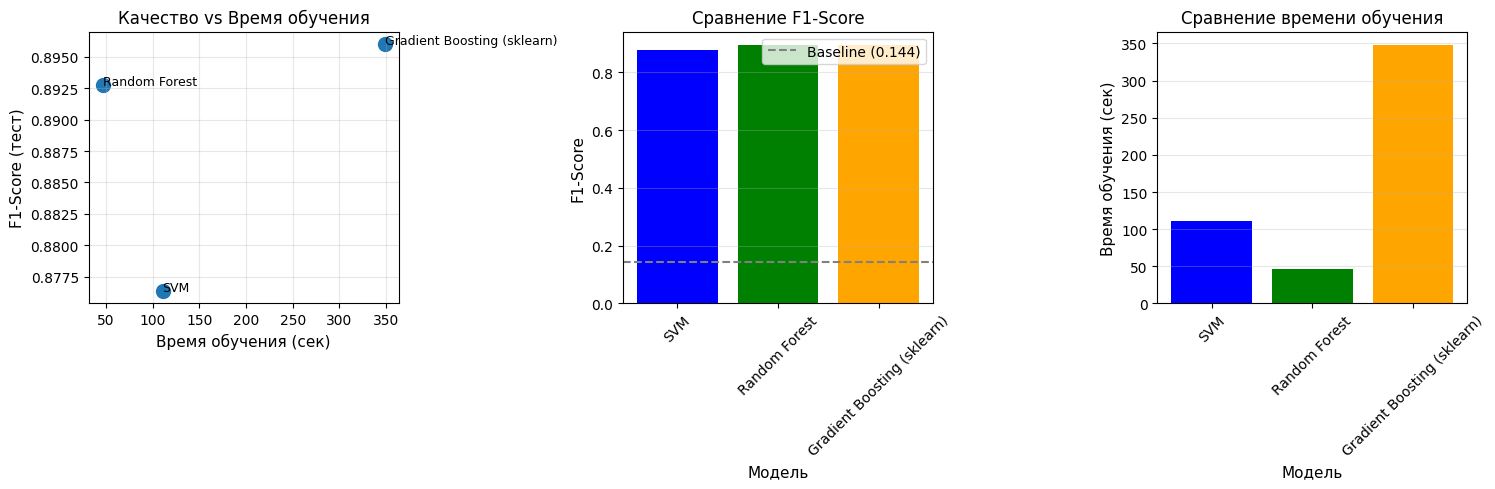

1. Random Forest:
F1-Score: 0.8927
Время обучения: 46.4 сек
Быстрое обучение, хорошие метрики на тесте

2. Gradient Boosting:
F1-Score: 0.8960
Время обучения: 348.6 сек
Долгое обучение,но хорошие метрики на тесте

3. SVM:
F1-Score: 0.8763
Время обучения: 110.6 сек
Долгое обучение,и самые плохие метрики на тесте

Самой оптимальной можно считать модель случайного леса, так как она обучается быстрее остальных и показывает метри лишь немного отстающие от метрик градиентного бустинга


In [ ]:

import pandas as pd

comparison_df = pd.DataFrame(results)

print(comparison_df[['Model_name', 'Test_F1', 'Train_Time']].to_string(index=False))

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

models = comparison_df['Model_name'].values
f1_scores = comparison_df['Test_F1'].values
train_times = comparison_df['Train_Time'].values

axes[0].scatter(train_times, f1_scores, s=100)
for i, model in enumerate(models):
    axes[0].annotate(model, (train_times[i], f1_scores[i]), fontsize=9)
axes[0].set_xlabel('Время обучения (сек)', fontsize=11)
axes[0].set_ylabel('F1-Score (тест)', fontsize=11)
axes[0].set_title('Качество vs Время обучения', fontsize=12)
axes[0].grid(True, alpha=0.3)


axes[1].bar(models, f1_scores, color=['blue', 'green', 'orange', 'red'])
axes[1].axhline(y=baseline_f1, color='gray', linestyle='--', label=f'Baseline ({baseline_f1:.3f})')
axes[1].set_xlabel('Модель', fontsize=11)
axes[1].set_ylabel('F1-Score', fontsize=11)
axes[1].set_title('Сравнение F1-Score', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')


axes[2].bar(models, train_times, color=['blue', 'green', 'orange', 'red'])
axes[2].set_xlabel('Модель', fontsize=11)
axes[2].set_ylabel('Время обучения (сек)', fontsize=11)
axes[2].set_title('Сравнение времени обучения', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("1. Random Forest:")
print(f"F1-Score: {comparison_df.loc[1, 'Test_F1']:.4f}")
print(f"Время обучения: {comparison_df.loc[1, 'Train_Time']:.1f} сек")
print(f"Быстрое обучение, хорошие метрики на тесте")

print("\n2. Gradient Boosting:")
print(f"F1-Score: {comparison_df.loc[2, 'Test_F1']:.4f}")
print(f"Время обучения: {comparison_df.loc[2, 'Train_Time']:.1f} сек")
print(f"Долгое обучение,но хорошие метрики на тесте")

print("\n3. SVM:")
print(f"F1-Score: {comparison_df.loc[0, 'Test_F1']:.4f}")
print(f"Время обучения: {comparison_df.loc[0, 'Train_Time']:.1f} сек")
print(f"Долгое обучение,и самые плохие метрики на тесте")


print(f"\nСамой оптимальной можно считать модель случайного леса, так как она обучается быстрее остальных и показывает метри лишь немного отстающие от метрик градиентного бустинга")

### Создаём два датфрейма - для мужчин и для женщин
#### Так как прдварительный анализ показал, что классы целевой переменной имеют сильно различное распределение для разных полов
#### На основе этого проверим будет ли эффективнее создать две разных модели для разных полов

In [ ]:
df_male=df[df['Gender'].isin(['Male'])]
df_female=df[df['Gender'].isin(['Female'])]

In [ ]:
categorical_cols = ['family_history_with_overweight', 'FAVC', 'CAEC',
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']
X_male = df_male[numeric_cols + categorical_cols].copy()
y_male = df_male['NObeyesdad']
X_female = df_female[numeric_cols + categorical_cols].copy()
y_female = df_female['NObeyesdad']

In [ ]:
le = LabelEncoder()
y_encoded_male = le.fit_transform(y_male)
y_encoded_female = le.fit_transform(y_female)
X_train_male,  X_test_male,y_train_male, y_test_male = train_test_split(X_male, y_encoded_male,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded_male
)
X_train_female,  X_test_female,y_train_female, y_test_female = train_test_split(X_female, y_encoded_female,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded_female
)

In [ ]:
results_male = search_params(X_train_male,y_train_male,X_test_male, y_test_male, without_gender=True)

2. ТЕСТИРОВАНИЕ И СРАВНЕНИЕ МОДЕЛЕЙ С ГИПЕРПАРАМЕТРИЗАЦИЕЙ

 ГИПЕРПАРАМЕТРИЗАЦИЯ SVM:
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\admin1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


   Лучшие параметры: {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
   Лучший CV F1-Score: 0.7533
   Тестовый F1-Score: 0.7204
   Время обучения: 79.13 сек

 ГИПЕРПАРАМЕТРИЗАЦИЯ Random Forest:
Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\admin1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


   Лучшие параметры: {'classifier__max_depth': 20, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
   Лучший CV F1-Score: 0.7736
   Тестовый F1-Score: 0.7430
   Время обучения: 41.66 сек

 ГИПЕРПАРАМЕТРИЗАЦИЯ Gradient Boosting (sklearn):
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\admin1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


   Лучшие параметры: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
   Лучший CV F1-Score: 0.7738
   Тестовый F1-Score: 0.7453
   Время обучения: 246.08 сек


In [ ]:
results_female = search_params(X_train_female,y_train_female,X_test_female, y_test_female, True)

2. ТЕСТИРОВАНИЕ И СРАВНЕНИЕ МОДЕЛЕЙ С ГИПЕРПАРАМЕТРИЗАЦИЕЙ

 ГИПЕРПАРАМЕТРИЗАЦИЯ SVM:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
   Лучшие параметры: {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
   Лучший CV F1-Score: 0.7182
   Тестовый F1-Score: 0.7135
   Время обучения: 32.88 сек

 ГИПЕРПАРАМЕТРИЗАЦИЯ Random Forest:
Fitting 5 folds for each of 27 candidates, totalling 135 fits
   Лучшие параметры: {'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
   Лучший CV F1-Score: 0.7470
   Тестовый F1-Score: 0.7464
   Время обучения: 35.57 сек

 ГИПЕРПАРАМЕТРИЗАЦИЯ Gradient Boosting (sklearn):
Fitting 5 folds for each of 12 candidates, totalling 60 fits
   Лучшие параметры: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
   Лучший CV F1-Score: 0.7493
   Тестовый F1-Score: 0.7514
   Время обучения: 230.99 сек


### В итоге получаем, что разбиение на две разных модели для полов не даёт улучшения метрик, а наоборот ухудшает их
#### Из всех рассмотренных в данном проекте моделей наилучшие метрики имеет модель градиентого бустинга с подбором гиперпараметров с помощью GridSearchCV
#### Самой же оптимальной моделью с точки зрения баланса между временем обучения и получившимися метриками можно считать модель случайного леса, гиперпараметры для которой так же подбирались с помошью GridSearchCV

preprocessor: ColumnTransformer
classifier: GradientBoostingClassifier


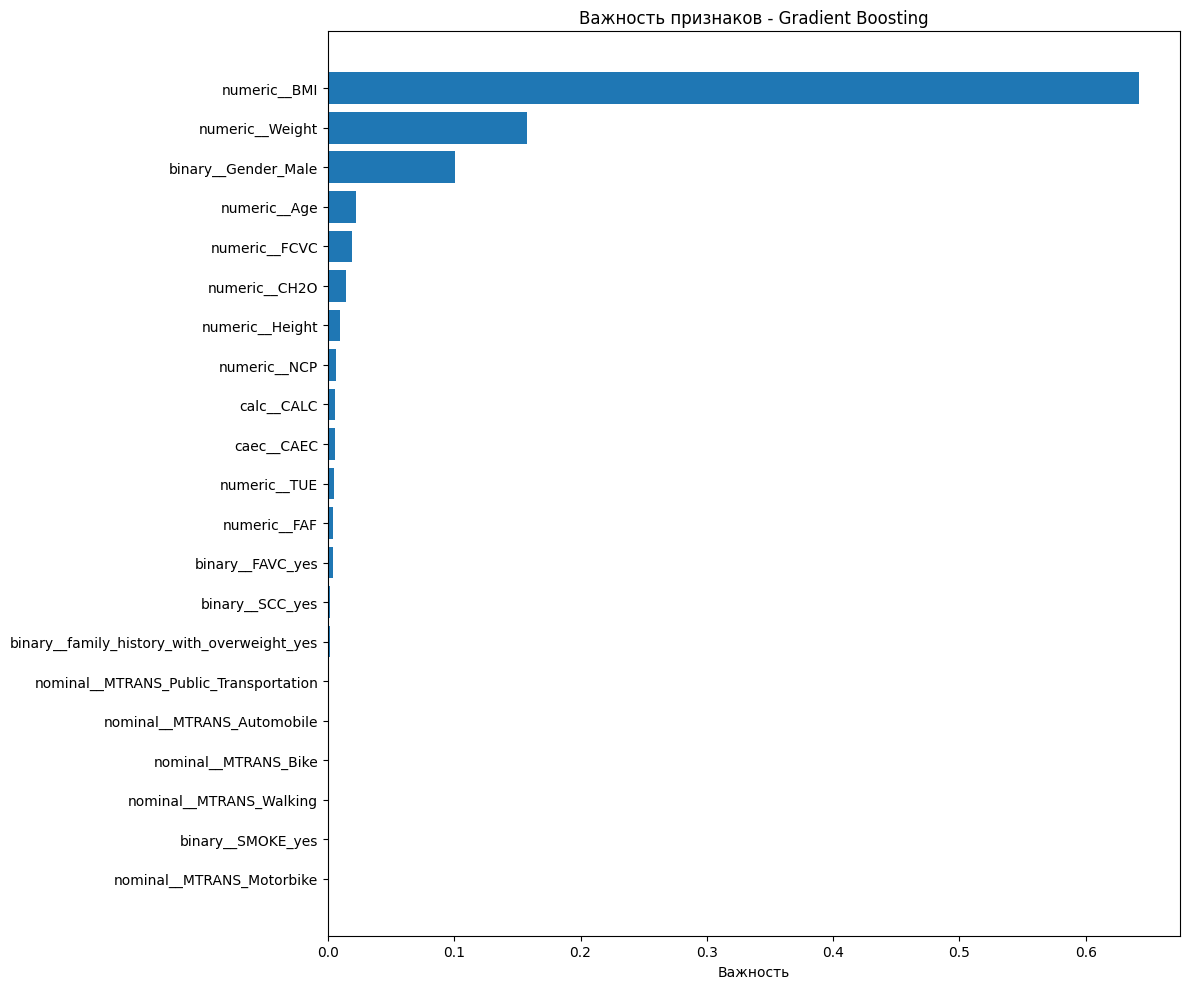

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
model = results[2]['Model'].named_steps['classifier']
importances = model.feature_importances_
pipeline = results[2]['Model']
for name, step in pipeline.named_steps.items():
    print(f"{name}: {type(step).__name__}")
pipeline = results[2]['Model']
model = pipeline.named_steps['classifier']
importances = model.feature_importances_

feature_names = []

for name, step in pipeline.named_steps.items():
    if name != 'classifier' and hasattr(step, 'get_feature_names_out'):
        if len(feature_names) == 0:
            feature_names = list(X.columns)
        feature_names = step.get_feature_names_out(feature_names)

plt.figure(figsize=(12, 10))
plt.barh(range(len(sorted_idx)), importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Важность')
plt.title('Важность признаков - Gradient Boosting')
plt.tight_layout()
plt.show()

#### Из анализа важности признаков можно заметить, что достаточно важными признаками являются количество выпиваемой воды, частота употребления овощей, количесвто основных приёмов пищи и прочие поведеньческие признаки, исходя из этого можно сказать, что применение модели риска ожирения целесообразно в задачах профилактики и раннего вмешательства, поскольку она обеспечивает более информативную оценку будущих рисков, связанных с образом жизни, и способствует принятию превентивных мер до формирования клинических проявлений ожирения.